In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.preprocessing import LabelBinarizer

In [2]:
datasetpath="D:/pythonCode/projects/Fundus/1000images"

In [3]:
classes=os.listdir(datasetpath)

In [4]:
print(classes)

['Bietti crystalline dystrophy', 'Blur fundus with suspected PDR', 'Blur fundus without PDR', 'BRVO', 'Chorioretinal atrophy-coloboma', 'Congenital disc abnormality', 'Cotton-wool spots', 'CRVO', 'CSCR', 'Disc swelling and elevation', 'DR1', 'DR2', 'DR3', 'Dragged Disc', 'ERM', 'Fibrosis', 'Fundus neoplasm', 'Large optic cup', 'Laser Spots', 'Maculopathy', 'Massive hard exudates', 'MH', 'Myelinated nerve fiber', 'Normal', 'Optic atrophy', 'Pathological myopia', 'Peripheral retinal degeneration and break', 'Possible glaucoma', 'Preretinal hemorrhage', 'RAO', 'Retinitis pigmentosa', 'Rhegmatogenous RD', 'Severe hypertensive retinopathy', 'Silicon oil in eye', 'Tessellated fundus', 'Vessel tortuosity', 'Vitreous particles', 'VKH disease', 'Yellow-white spots-flecks']


In [5]:
print("Total number of classes are:{}".format(len(os.listdir(datasetpath))))

Total number of classes are:39


In [6]:
nums={}
for i in classes:
    nums[i]=len(os.listdir(datasetpath+"/"+i))

img_per_class=pd.DataFrame(nums.values(),index=nums.keys(),columns=["images"])
    


In [7]:
img_per_class

,images
Bietti crystalline dystrophy,8
Blur fundus with suspected PDR,45
Blur fundus without PDR,114
BRVO,44
Chorioretinal atrophy-coloboma,15
Congenital disc abnormality,10
Cotton-wool spots,10
CRVO,22
CSCR,14
Disc swelling and elevation,13


In [8]:
img_per_class.sum()

images    1000
dtype: int64

In [9]:
filepaths = list(glob.glob(datasetpath+'/**/*.*'))

In [10]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,D:/pythonCode/projects/Fundus/1000images\Macul...,Maculopathy
1,D:/pythonCode/projects/Fundus/1000images\Blur ...,Blur fundus with suspected PDR
2,D:/pythonCode/projects/Fundus/1000images\DR2\1...,DR2
3,D:/pythonCode/projects/Fundus/1000images\Myeli...,Myelinated nerve fiber
4,D:/pythonCode/projects/Fundus/1000images\Blur ...,Blur fundus without PDR


In [11]:
Y=np.array(data['Label'])

In [12]:
one_hot=LabelBinarizer()
Y=one_hot.fit_transform(Y)


In [13]:
classes=one_hot.classes_

In [14]:
classes

array(['BRVO', 'Bietti crystalline dystrophy',
       'Blur fundus with suspected PDR', 'Blur fundus without PDR',
       'CRVO', 'CSCR', 'Chorioretinal atrophy-coloboma',
       'Congenital disc abnormality', 'Cotton-wool spots', 'DR1', 'DR2',
       'DR3', 'Disc swelling and elevation', 'Dragged Disc', 'ERM',
       'Fibrosis', 'Fundus neoplasm', 'Large optic cup', 'Laser Spots',
       'MH', 'Maculopathy', 'Massive hard exudates',
       'Myelinated nerve fiber', 'Normal', 'Optic atrophy',
       'Pathological myopia', 'Peripheral retinal degeneration and break',
       'Possible glaucoma', 'Preretinal hemorrhage', 'RAO',
       'Retinitis pigmentosa', 'Rhegmatogenous RD',
       'Severe hypertensive retinopathy', 'Silicon oil in eye',
       'Tessellated fundus', 'VKH disease', 'Vessel tortuosity',
       'Vitreous particles', 'Yellow-white spots-flecks'], dtype='<U41')

In [15]:
Dic={}
x=0
for i in classes:
    dic={x:i}
    Dic.update(dic)
    x=x+1
    

In [16]:
Dic

{0: 'BRVO',
 1: 'Bietti crystalline dystrophy',
 2: 'Blur fundus with suspected PDR',
 3: 'Blur fundus without PDR',
 4: 'CRVO',
 5: 'CSCR',
 6: 'Chorioretinal atrophy-coloboma',
 7: 'Congenital disc abnormality',
 8: 'Cotton-wool spots',
 9: 'DR1',
 10: 'DR2',
 11: 'DR3',
 12: 'Disc swelling and elevation',
 13: 'Dragged Disc',
 14: 'ERM',
 15: 'Fibrosis',
 16: 'Fundus neoplasm',
 17: 'Large optic cup',
 18: 'Laser Spots',
 19: 'MH',
 20: 'Maculopathy',
 21: 'Massive hard exudates',
 22: 'Myelinated nerve fiber',
 23: 'Normal',
 24: 'Optic atrophy',
 25: 'Pathological myopia',
 26: 'Peripheral retinal degeneration and break',
 27: 'Possible glaucoma',
 28: 'Preretinal hemorrhage',
 29: 'RAO',
 30: 'Retinitis pigmentosa',
 31: 'Rhegmatogenous RD',
 32: 'Severe hypertensive retinopathy',
 33: 'Silicon oil in eye',
 34: 'Tessellated fundus',
 35: 'VKH disease',
 36: 'Vessel tortuosity',
 37: 'Vitreous particles',
 38: 'Yellow-white spots-flecks'}

In [17]:
Y=pd.DataFrame(Y)

In [18]:
Y.rename(columns=Dic,inplace=True)

In [19]:
Y.head()

,BRVO,Bietti crystalline dystrophy,Blur fundus with suspected PDR,Blur fundus without PDR,CRVO,CSCR,Chorioretinal atrophy-coloboma,Congenital disc abnormality,Cotton-wool spots,DR1,...,RAO,Retinitis pigmentosa,Rhegmatogenous RD,Severe hypertensive retinopathy,Silicon oil in eye,Tessellated fundus,VKH disease,Vessel tortuosity,Vitreous particles,Yellow-white spots-flecks
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
Y.describe()

,BRVO,Bietti crystalline dystrophy,Blur fundus with suspected PDR,Blur fundus without PDR,CRVO,CSCR,Chorioretinal atrophy-coloboma,Congenital disc abnormality,Cotton-wool spots,DR1,...,RAO,Retinitis pigmentosa,Rhegmatogenous RD,Severe hypertensive retinopathy,Silicon oil in eye,Tessellated fundus,VKH disease,Vessel tortuosity,Vitreous particles,Yellow-white spots-flecks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.044000,0.008000,0.045000,0.11400,0.022000,0.014000,0.015000,0.010000,0.010000,0.018000,...,0.016000,0.022000,0.057000,0.015000,0.019000,0.013000,0.014000,0.014000,0.014000,0.02900
std,0.205198,0.089129,0.207408,0.31797,0.146757,0.117549,0.121613,0.099549,0.099549,0.133018,...,0.125538,0.146757,0.231959,0.121613,0.136593,0.113331,0.117549,0.117549,0.117549,0.16789
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [21]:
data.describe()

,Filepath,Label
count,1000,1000
unique,1000,39
top,D:/pythonCode/projects/Fundus/1000images\Macul...,Blur fundus without PDR
freq,1,114


In [22]:
def show_image(path):
    im=cv2.imread(path)
    im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    # im=cv2.resize(im,[200,200])
    # im=cv2.resize(im,[256,256])
    im=cv2.resize(im,[1024,1024])
    plt.figure(figsize=[10,10])
    plt.imshow(im)
    print(im.shape)

In [ ]:
show_image(data['Filepath'][0])

In [24]:
for i in range(len(data)):
    im=cv2.imread(data['Filepath'][i])
    im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    im=cv2.resize(im,[1024,1024])
    im=im.astype(np.float32)/255.0
    data['Filepath'][i]=im
    

In [25]:
data.rename(columns={'Filepath':'Image'},inplace=True)

In [26]:
data.head()

,Image,Label
0,"[[[0.019607844, 0.011764706, 0.015686275], [0....",Maculopathy
1,"[[[0.003921569, 0.003921569, 0.003921569], [0....",Blur fundus with suspected PDR
2,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",DR2
3,"[[[0.019607844, 0.011764706, 0.015686275], [0....",Myelinated nerve fiber
4,"[[[0.015686275, 0.015686275, 0.015686275], [0....",Blur fundus without PDR


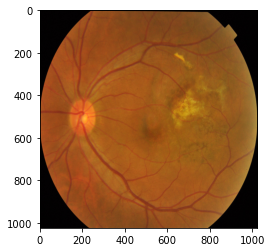

In [27]:
plt.imshow(data['Image'][0])

In [ ]:
data.to_csv('data.csv')

In [25]:
train=data[:700]
valid=data[700:800]
test=data[800:1000]

In [26]:
X_train=np.array(train['Filepath'])
X_test=np.array(test['Filepath'])
X_valid=np.array(valid['Filepath'])


In [27]:
y_train=np.array(Y[:700])
y_test=np.array(Y[700:800])
y_valid=np.array(Y[800:1000])
